In [ ]:
###5)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate a dataset with two classes
X, y = datasets.make_classification(n_samples=50, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Define a function to plot the decision boundary and support vectors
def plot_svm(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.decision_function(xy).reshape(xx.shape)

    # plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300,
               linewidth=1, facecolors='none', edgecolors='k')
    
# Create a hard margin SVM model
svm_hard_margin = SVC(kernel='linear', C=1e10)
svm_hard_margin.fit(X, y)

# Create a soft margin SVM model
svm_soft_margin = SVC(kernel='linear', C=0.1)
svm_soft_margin.fit(X, y)

# Plot the decision boundaries and support vectors
plt.figure(figsize=(12, 5))

# Hard margin SVM
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plot_svm(svm_hard_margin)
plt.title('Hard Margin SVM')

# Soft margin SVM
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plot_svm(svm_soft_margin)
plt.title('Soft Margin SVM')

plt.tight_layout()
plt.show()


Accuracy: 0.90


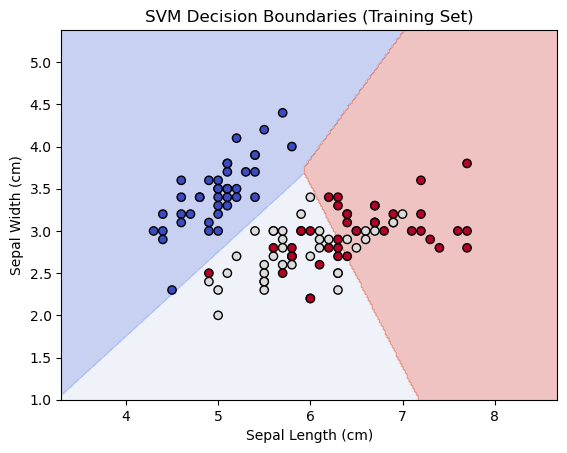

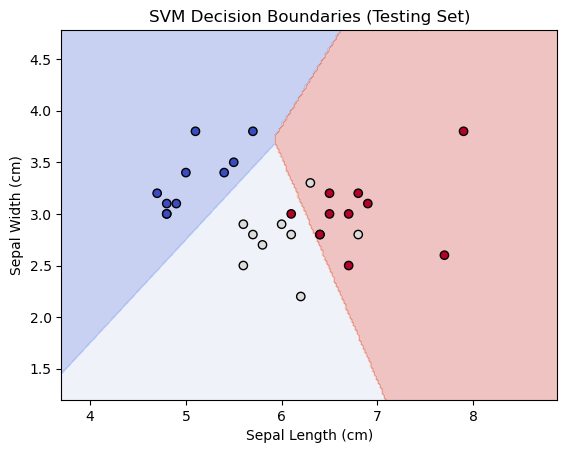

Accuracy (C=0.1): 0.83
Accuracy (C=1): 0.90
Accuracy (C=10): 0.90


In [2]:
###6)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting only the first two features for visualization
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier on the training set
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svm_classifier.predict(X_test)

# Compute the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundaries of the trained model using two of the features
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.show()

# Plot decision boundaries for the trained model
plot_decision_boundary(X_train, y_train, svm_classifier, 'SVM Decision Boundaries (Training Set)')
plot_decision_boundary(X_test, y_test, svm_classifier, 'SVM Decision Boundaries (Testing Set)')

# Try different values of the regularization parameter C and observe performance
C_values = [0.1, 1, 10]

for C_val in C_values:
    svm_classifier = SVC(kernel='linear', C=C_val)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy (C={C_val}): {accuracy:.2f}")
